<a href="https://colab.research.google.com/github/mihaipatrascanu/ce888-repo/blob/main/Assigment_1/Assigment_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2020-12-kent-street.csv to 2020-12-kent-street.csv


In [3]:
#Read dataset of kent street
import pandas as pd
df=pd.read_csv("2020-12-kent-street.csv")
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,8d4544b7a30f88116299606d164e08462513e8feb8a9ce...,2020-12,Kent Police,Kent Police,-1.459830,53.026488,On or near Farm Close,E01019411,Amber Valley 011B,Violence and sexual offences,Under investigation,NaN
1,adbf054b39875e6fc9f01acf0d48dfbfeed39e372470e7...,2020-12,Kent Police,Kent Police,-0.656614,50.787593,On or near Parking Area,E01031419,Arun 015C,Violence and sexual offences,Under investigation,NaN
2,NaN,2020-12,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
3,NaN,2020-12,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
4,NaN,2020-12,Kent Police,Kent Police,0.962332,51.244504,On or near The Square,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN


In [4]:
#check dimension of a dataset
df.shape

(15461, 12)

In [5]:
###Data Cleaning
#check missing values
df.isnull().sum()

Crime ID                  3508
Month                        0
Reported by                  0
Falls within                 0
Longitude                  170
Latitude                   170
Location                     0
LSOA code                  170
LSOA name                  170
Crime type                   0
Last outcome category     3508
Context                  15461
dtype: int64

In [6]:
#drop unwanted columns
df1=df.drop(["Context","Crime ID","LSOA name","Location","Month","Reported by","Falls within"],axis=1)
df1.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,E01019411,Violence and sexual offences,Under investigation
1,-0.656614,50.787593,E01031419,Violence and sexual offences,Under investigation
2,0.968272,51.255956,E01023987,Anti-social behaviour,NaN
3,0.968272,51.255956,E01023987,Anti-social behaviour,NaN
4,0.962332,51.244504,E01023987,Anti-social behaviour,NaN


In [7]:
#drop missing values columns

df1=df1.dropna()
df2=df1.reset_index(drop=True)
df2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,E01019411,Violence and sexual offences,Under investigation
1,-0.656614,50.787593,E01031419,Violence and sexual offences,Under investigation
2,0.962332,51.244504,E01023987,Violence and sexual offences,Further investigation is not in the public int...
3,0.972125,51.243914,E01023987,Violence and sexual offences,Investigation complete; no suspect identified
4,0.977265,51.224984,E01023988,Other theft,Under investigation


In [8]:
#check data types
df2.dtypes

Longitude                float64
Latitude                 float64
LSOA code                 object
Crime type                object
Last outcome category     object
dtype: object

In [9]:
#Apply label encoding
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()

df2['LSOA code']=l1.fit_transform(df2['LSOA code'])
df2['Crime type']=l2.fit_transform(df2['Crime type'])
df2['Last outcome category']=l3.fit_transform(df2['Last outcome category'])
df2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,193,12,12
1,-0.656614,50.787593,1034,12,12
2,0.962332,51.244504,214,12,4
3,0.972125,51.243914,214,12,5
4,0.977265,51.224984,215,5,12


In [10]:
#Apply standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1=sc.fit_transform(df2)
sc_X = pd.DataFrame(data=sc1, columns=df2.columns)
df2=sc_X

In [11]:
#take dependent and independent variables
x=df2.drop(['Last outcome category'],axis=1)
y=df2['Last outcome category']

In [12]:
#Splitting of a dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
#Support Vector Regression
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
predict=svr.predict(x_test)
predict


array([ 0.64651908, -0.03925119, -0.1842961 , ...,  0.65143738,
       -0.74725496, -0.91194675])

In [14]:
#Evaluation metrics of support vector regression
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt

print("Mean Absolute Error of SVR:- ",mean_absolute_error(y_test,predict))
print("Root Mean Squared Error of SVR:- ",sqrt(mean_squared_error(y_test,predict)))
print("R2 Square Value of SVR:- ",r2_score(y_test,predict))

Mean Absolute Error of SVR:-  0.7149539180150659


NameError: ignored

In [15]:
#Linear Regression
from sklearn import linear_model
regression = linear_model.LinearRegression() 
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
y_pred

array([ 0.24810391,  0.16636343,  0.16358007, ...,  0.20470202,
       -0.33806   , -0.17664265])

In [16]:
#Evaluation metrics of linear regression
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt

print("Mean Absolute Error of Linear Regression:- ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error of Linear Regression:- ",sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Square Value of Linear Regression:- ",r2_score(y_test,y_pred))

Mean Absolute Error of Linear Regression:-  0.8677962110614938


NameError: ignored

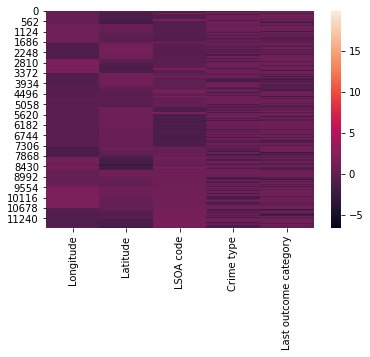

In [17]:
###Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df2)
plt.show()

In [18]:
import plotly.express as px
fig = px.density_mapbox(df2, lat=df2['Latitude'], lon=df2['Longitude'], z='Last outcome category', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [19]:
set(df['Crime type'])

{'Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences'}

In [20]:
set(df['Last outcome category'])

{'Action to be taken by another organisation',
 'Awaiting court outcome',
 'Formal action is not in the public interest',
 'Further action is not in the public interest',
 'Further investigation is not in the public interest',
 'Investigation complete; no suspect identified',
 'Local resolution',
 'Offender given a caution',
 'Offender given a drugs possession warning',
 'Offender given penalty notice',
 'Suspect charged as part of another case',
 'Unable to prosecute suspect',
 'Under investigation',
 nan}